# Problem Statement 1:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail)

# Import packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
%matplotlib inline
import os
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

# Import data

In [2]:
df = pd.read_csv('Wholesale_Customers_Data.csv')
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.0+ KB


# Read summary

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [7]:
df.size

3960

In [9]:
df.shape

(440, 9)

In [ ]:
df.info()

# Checking null counts

In [32]:
np.any(pd.isna(df))

False

In [33]:

print('Number of null values in entire dataset',df.isnull().sum().sum())


Number of null values in entire dataset 0


In [34]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


# EDA

In [17]:
# CHeck for channel count

df['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [18]:
# CHeck for channel count

df['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

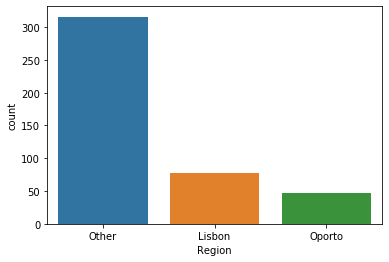

In [24]:
sns.countplot(x="Region", data=df)
plt.show()

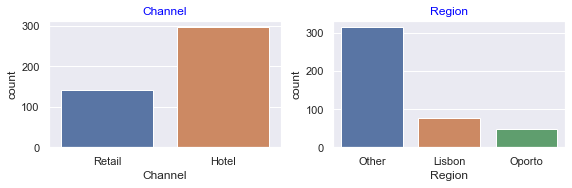

In [41]:
data_plot=df[df.dtypes[df.dtypes=='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(3,3,i+1)
   sns.countplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

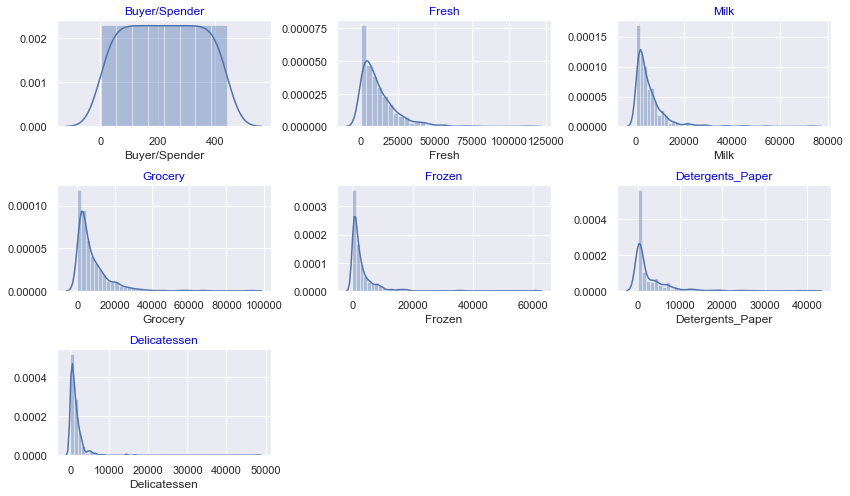

In [42]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(3,3,i+1)
   sns.distplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

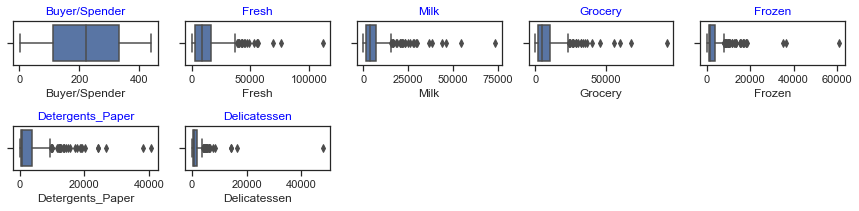

In [52]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(5,5,i+1)
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

# 2 Variables check

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


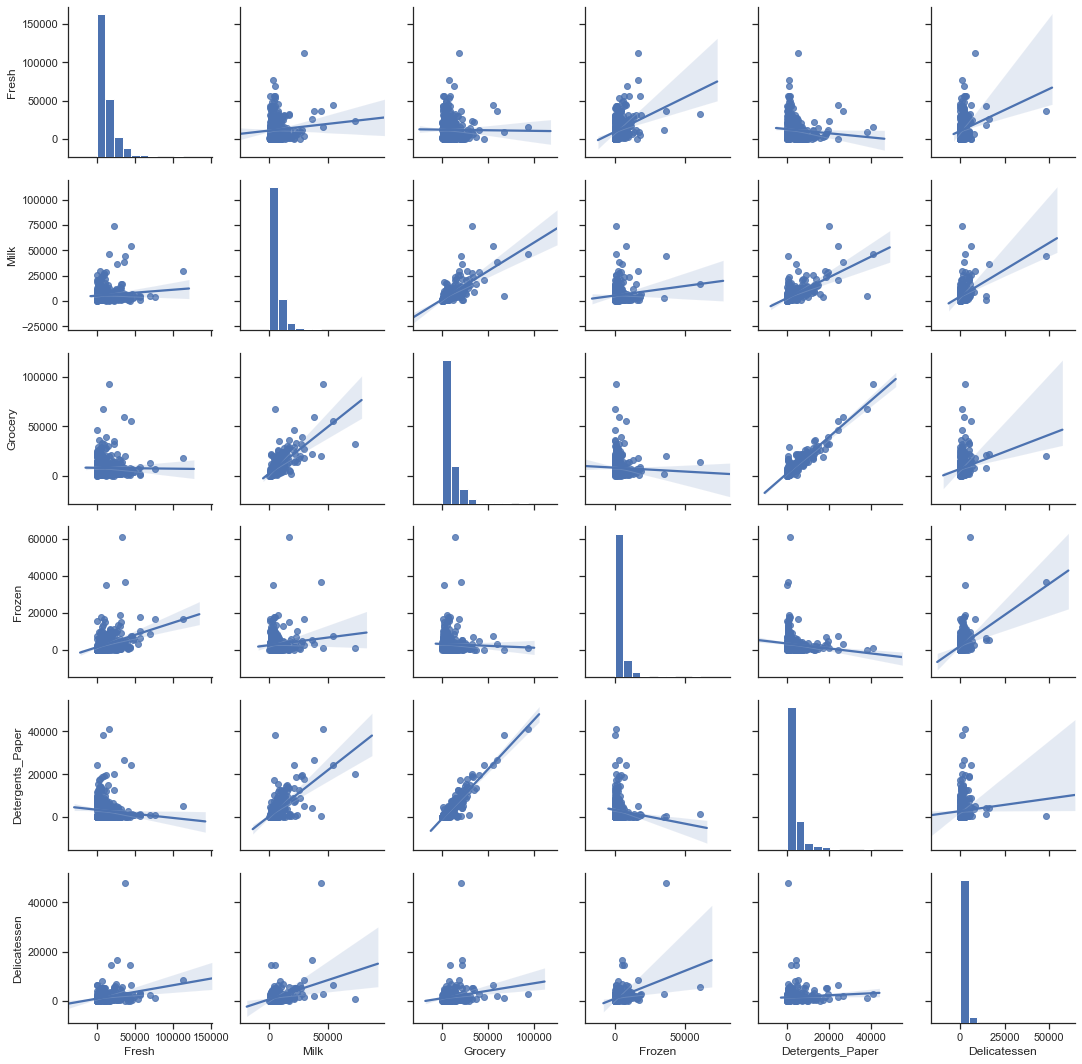

In [53]:
data_plot.drop(['Buyer/Spender'], axis='columns', inplace=True)
sns.set(style="ticks")
plots = sns.pairplot(data_plot,kind='reg')
plots.fig.set_size_inches(15,15)


# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [100]:
# Create Total spend column
df['total spend']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']

In [57]:
print('Descriptive Statastics of wholesale customer Data:')
df.describe(include='all').T

Descriptive Statastics of wholesale customer Data:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943
total spend,440,NaN,NaN,NaN,33226.1,26356.3,904,17448.8,27492,41307.5,199891


In [58]:
df.groupby('Region')['total spend'].sum()

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: total spend, dtype: int64

In [59]:
df.groupby('Channel')['total spend'].sum()

Channel
Hotel     7999569
Retail    6619931
Name: total spend, dtype: int64

In [62]:
df.groupby('Channel').mean()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total spend
Channel,,,,,,,,
Hotel,238.369128,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,26844.191275
Retail,183.000000,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,46619.232394


In [63]:
df.groupby('Region').mean()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total spend
Region,,,,,,,,
Lisbon,235.000000,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,30997.571429
Oporto,317.000000,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,33086.978723
Other,202.613924,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,33789.870253


In [60]:
df.groupby(['Channel','Region'])['total spend'].sum()

Channel  Region
Hotel    Lisbon    1538342
         Oporto     719150
         Other     5742077
Retail   Lisbon     848471
         Oporto     835938
         Other     4935522
Name: total spend, dtype: int64

# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer

## Fresh

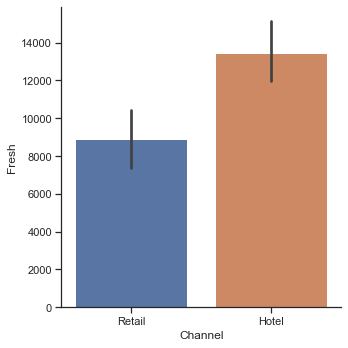

In [75]:
sns.catplot(x="Channel", y="Fresh",  kind="bar", data=df)
plt.show()

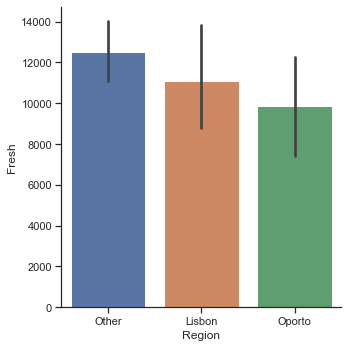

In [69]:
sns.catplot(x="Region", y="Fresh",  kind="bar", data=df)
plt.show()

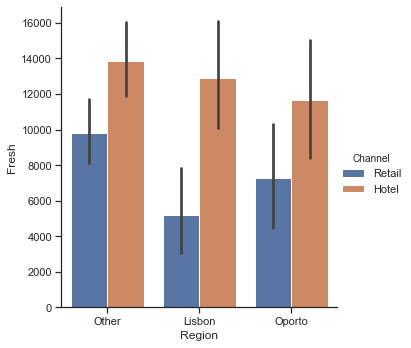

In [73]:
sns.catplot(x="Region", y="Fresh",  kind="bar", hue='Channel', data=df)
plt.show()

## Milk

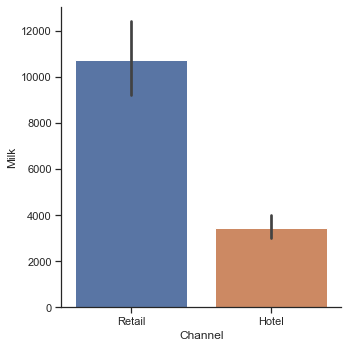

In [76]:
sns.catplot(x="Channel", y="Milk",  kind="bar", data=df)
plt.show()

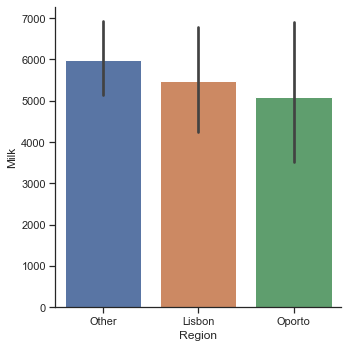

In [77]:
sns.catplot(x="Region", y="Milk",  kind="bar", data=df)
plt.show()

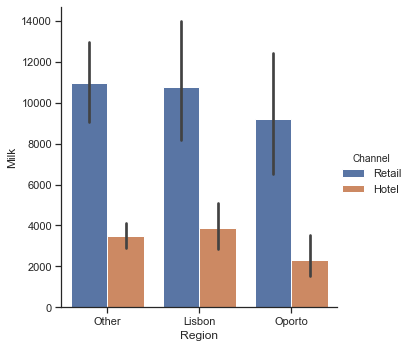

In [78]:
sns.catplot(x="Region", y="Milk",  kind="bar", hue='Channel', data=df)
plt.show()

## Grocery

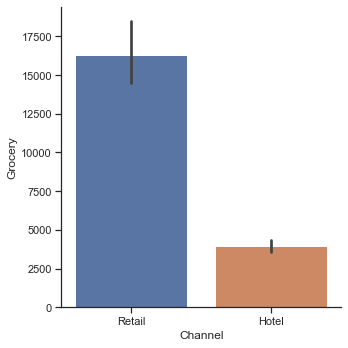

In [79]:
sns.catplot(x="Channel", y="Grocery",  kind="bar", data=df)
plt.show()

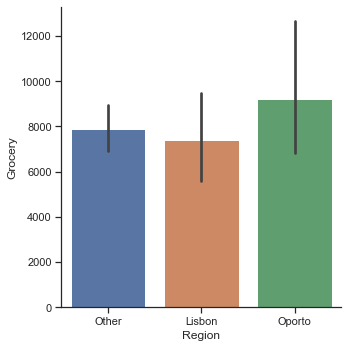

In [80]:
sns.catplot(x="Region", y="Grocery",  kind="bar", data=df)
plt.show()

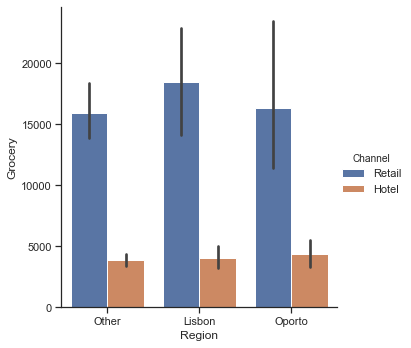

In [81]:
sns.catplot(x="Region", y="Grocery",  kind="bar", hue='Channel', data=df)
plt.show()

## Frozen

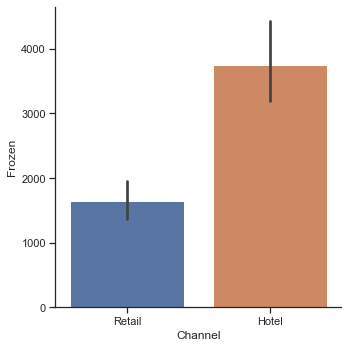

In [82]:
sns.catplot(x="Channel", y="Frozen",  kind="bar", data=df)
plt.show()

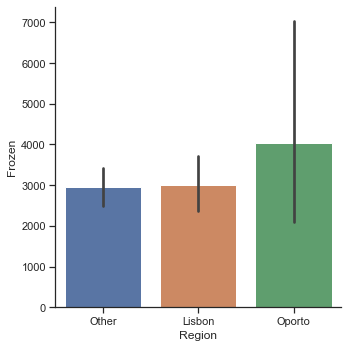

In [83]:
sns.catplot(x="Region", y="Frozen",  kind="bar", data=df)
plt.show()

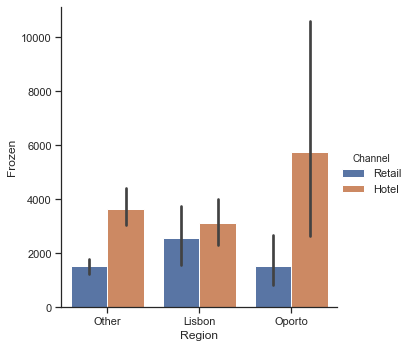

In [84]:
sns.catplot(x="Region", y="Frozen",  kind="bar", hue='Channel', data=df)
plt.show()

## Detergents_Paper

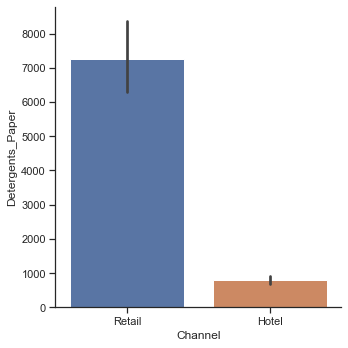

In [85]:
sns.catplot(x="Channel", y="Detergents_Paper",  kind="bar", data=df)
plt.show()

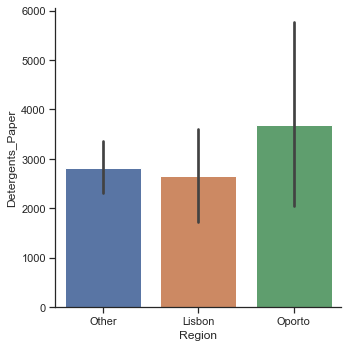

In [86]:
sns.catplot(x="Region", y="Detergents_Paper",  kind="bar", data=df)
plt.show()

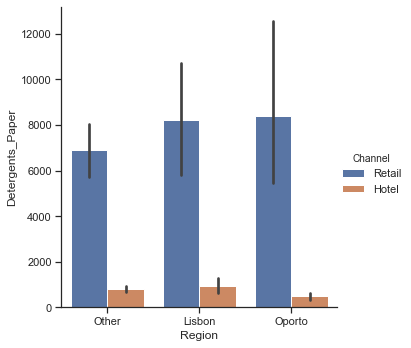

In [87]:
sns.catplot(x="Region", y="Detergents_Paper",  kind="bar", hue='Channel', data=df)
plt.show()

## Delicatessen

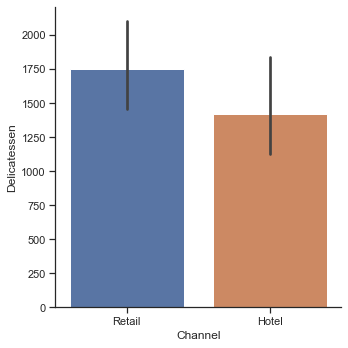

In [88]:
sns.catplot(x="Channel", y="Delicatessen",  kind="bar", data=df)
plt.show()

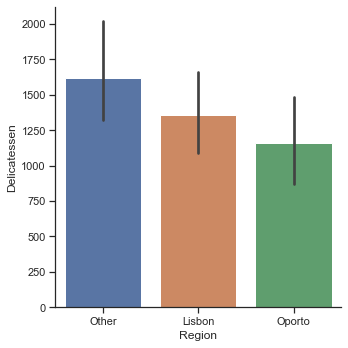

In [89]:
sns.catplot(x="Region", y="Delicatessen",  kind="bar", data=df)
plt.show()

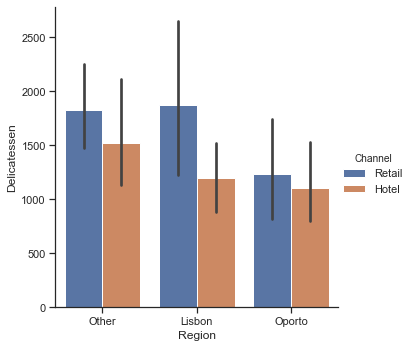

In [90]:
sns.catplot(x="Region", y="Delicatessen",  kind="bar", hue='Channel', data=df)
plt.show()

# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [93]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943
total spend,440,NaN,NaN,NaN,33226.1,26356.3,904,17448.8,27492,41307.5,199891


In [102]:
df.std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
total spend         26356.301730
dtype: float64

In [98]:
df.std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

## co.efficient 

In [107]:
co_fresh = np.std(df['Fresh']) / np.mean(df['Fresh'])
co_Milk = np.std(df['Milk']) / np.mean(df['Milk'])
co_Grocery = np.std(df['Grocery']) / np.mean(df['Grocery'])
co_Frozen = np.std(df['Frozen']) / np.mean(df['Frozen'])
co_Detergents_Paper = np.std(df['Detergents_Paper']) / np.mean(df['Detergents_Paper'])
co_Delicatessen = np.std(df['Delicatessen']) / np.mean(df['Delicatessen'])


In [108]:
[co_fresh ,co_Milk, co_Grocery, co_Frozen ,co_Detergents_Paper, co_Delicatessen]

[1.0527196084948245,
 1.2718508307424503,
 1.193815447749267,
 1.5785355298607762,
 1.6527657881041729,
 1.8473041039189306]

# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments

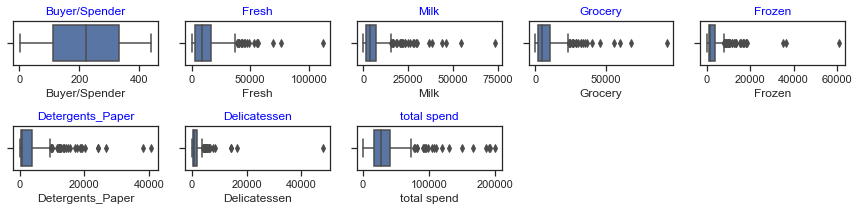

In [92]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(5,5,i+1)
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

In [109]:
df.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total spend
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,0.575178
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,0.776909
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,0.740680
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,0.388436
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,0.633882
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,0.496849
total spend,0.575178,0.776909,0.740680,0.388436,0.633882,0.496849,1.000000


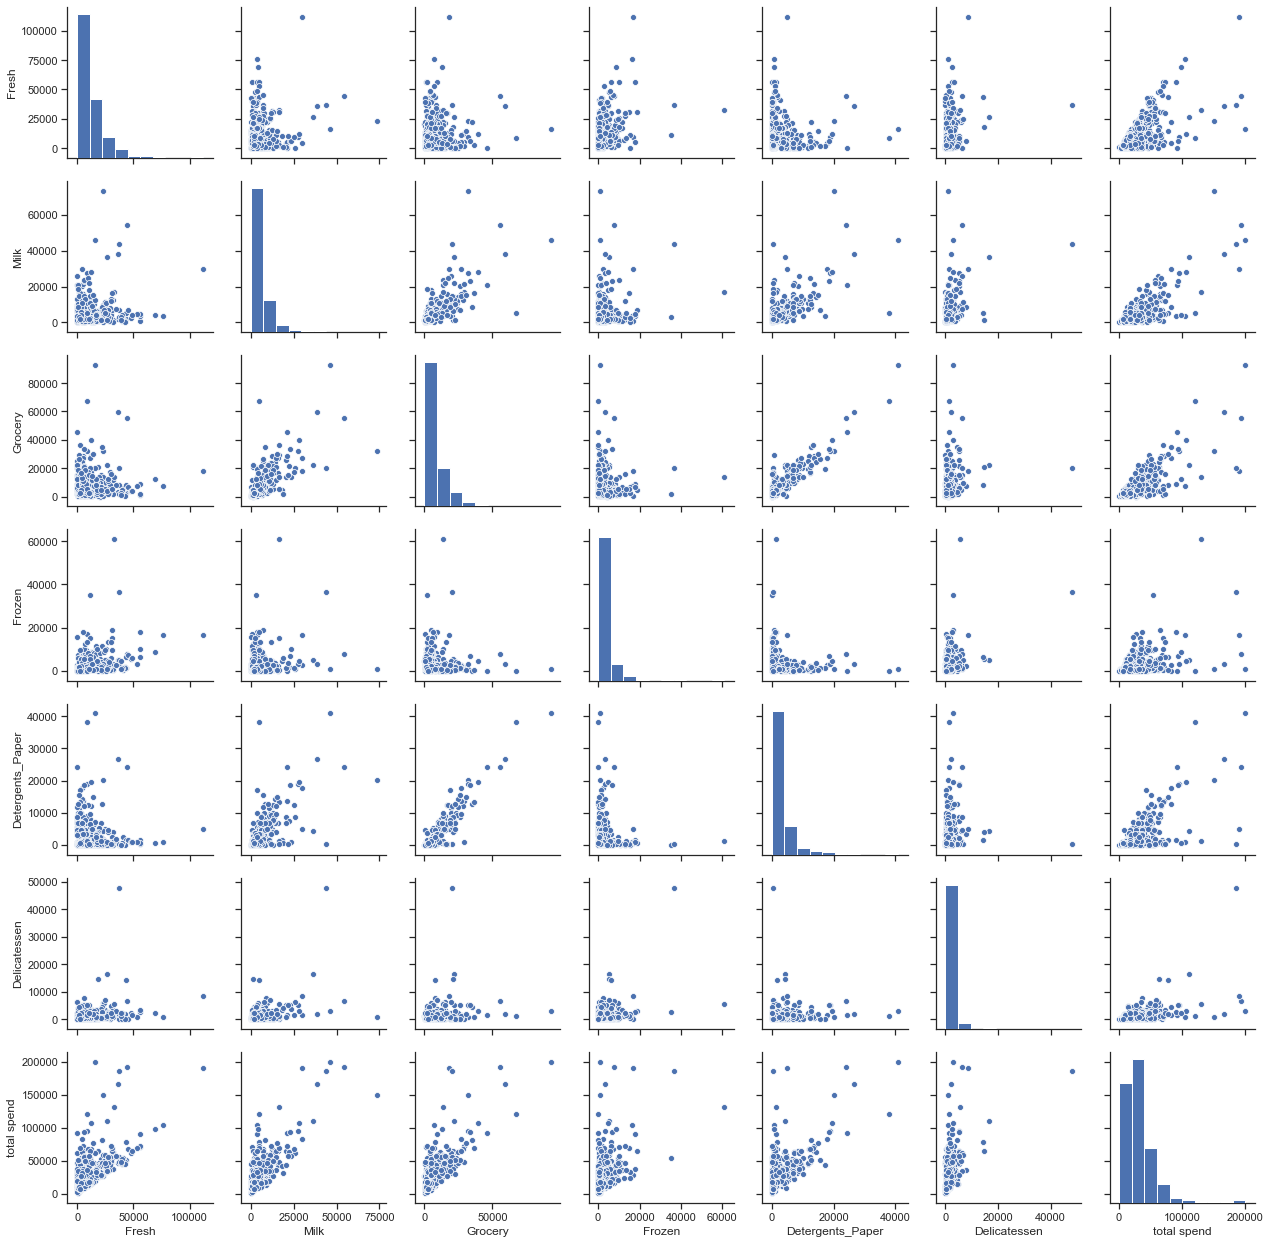

In [111]:
sns.pairplot(df)  #pairplot


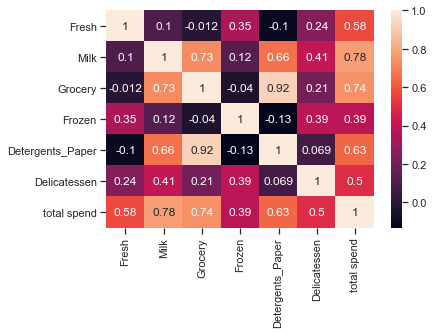

In [113]:
corr=df.corr()
sns.heatmap(corr, annot=True)
figsize=(50,30)

# Problem Statement 2:

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

# Import packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
%matplotlib inline
import os
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

# Import data

In [2]:
df = pd.read_csv('Survey-1.csv')
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
ID                   62 non-null int64
Gender               62 non-null object
Age                  62 non-null int64
Class                62 non-null object
Major                62 non-null object
Grad Intention       62 non-null object
GPA                  62 non-null float64
Employment           62 non-null object
Salary               62 non-null float64
Social Networking    62 non-null int64
Satisfaction         62 non-null int64
Spending             62 non-null int64
Computer             62 non-null object
Text Messages        62 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


# Read summary

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


In [4]:
df.size

868

In [5]:
df.shape

(62, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
ID                   62 non-null int64
Gender               62 non-null object
Age                  62 non-null int64
Class                62 non-null object
Major                62 non-null object
Grad Intention       62 non-null object
GPA                  62 non-null float64
Employment           62 non-null object
Salary               62 non-null float64
Social Networking    62 non-null int64
Satisfaction         62 non-null int64
Spending             62 non-null int64
Computer             62 non-null object
Text Messages        62 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


# Checking null counts

In [7]:
np.any(pd.isna(df))

False

In [8]:

print('Number of null values in entire dataset',df.isnull().sum().sum())


Number of null values in entire dataset 0


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62,NaN,NaN,NaN,31.5,18.0416,1,16.25,31.5,46.75,62
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62,NaN,NaN,NaN,21.129,1.43131,18,20,21,22,26
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62,NaN,NaN,NaN,3.12903,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62,NaN,NaN,NaN,48.5484,12.0809,25,40,50,55,80
Social Networking,62,NaN,NaN,NaN,1.51613,0.844305,0,1,1,2,4


# EDA

In [10]:
# CHeck for Gender count

df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [11]:
# CHeck for class count

df['Class'].value_counts()

Senior       31
Junior       25
Sophomore     6
Name: Class, dtype: int64

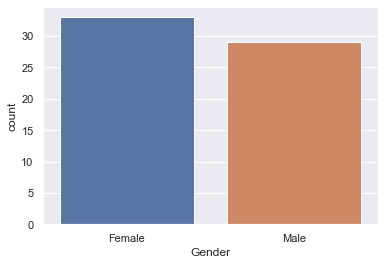

In [12]:
sns.countplot(x="Gender", data=df)
plt.show()

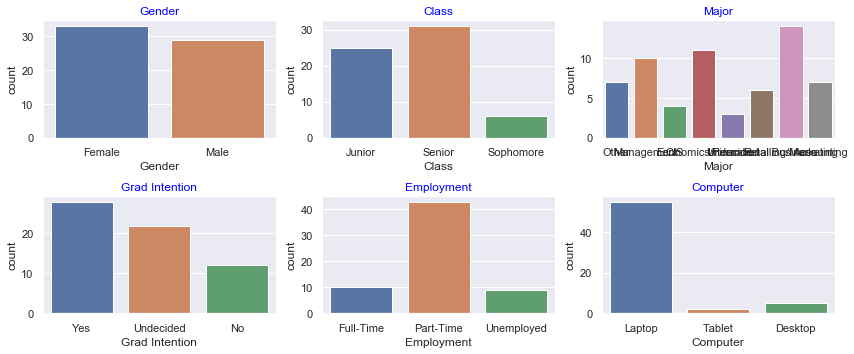

In [13]:
data_plot=df[df.dtypes[df.dtypes=='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(3,3,i+1)
   sns.countplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

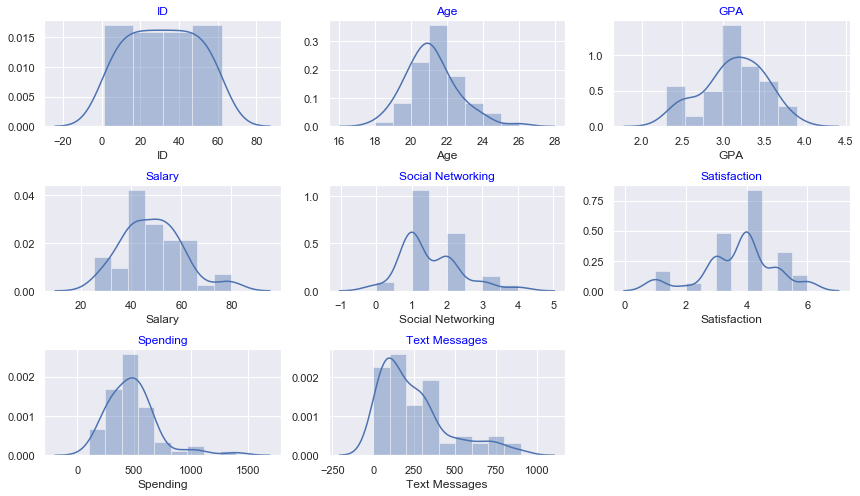

In [14]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(3,3,i+1)
   sns.distplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

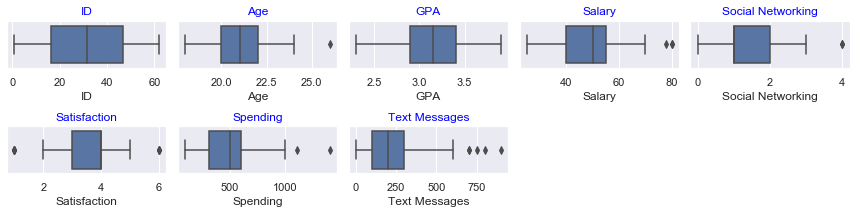

In [15]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(5,5,i+1)
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

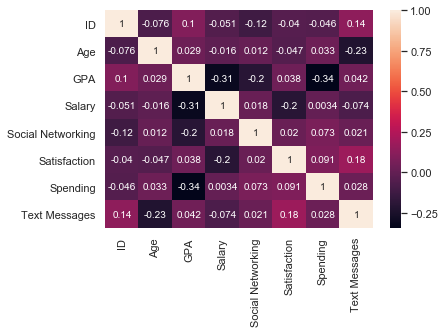

In [4]:
corr=df.corr()
sns.heatmap(corr, annot=True)
figsize=(50,30)

# 2 Variables check

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


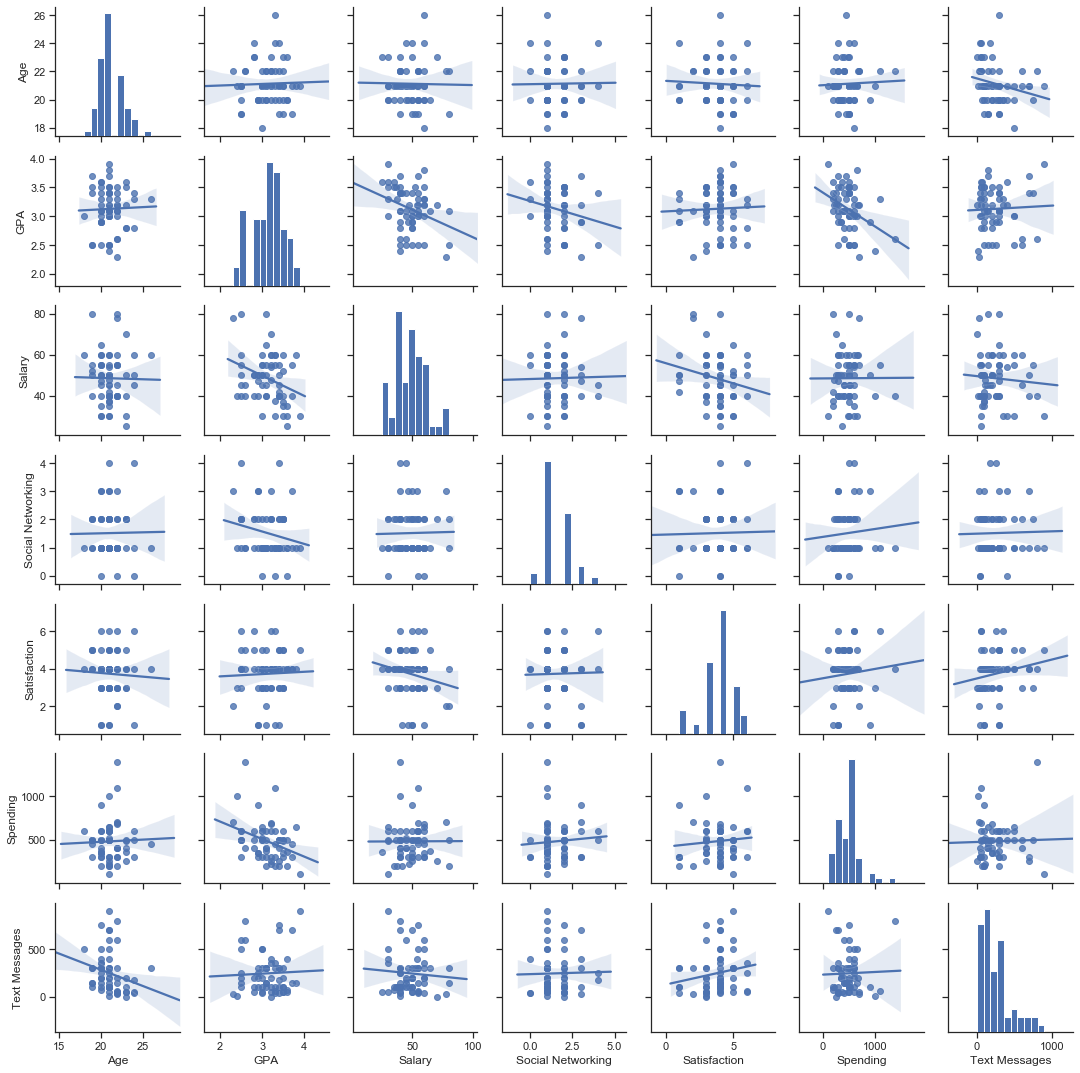

In [16]:
data_plot.drop(['ID'], axis='columns', inplace=True)
sns.set(style="ticks")
plots = sns.pairplot(data_plot,kind='reg')
plots.fig.set_size_inches(15,15)


# 2.1 For this data, construct the following contingency tables (Keep Gender as row variable)

## 2.1.1. Gender and Major

In [6]:
pd.crosstab(df['Gender'],df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


## 2.1.2. Gender and Grad Intention

In [19]:
pd.crosstab(df['Gender'],df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


## 2.1.3. Gender and Employment

In [20]:
pd.crosstab(df['Gender'],df['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


## 2.1.4. Gender and Computer

In [21]:
pd.crosstab(df['Gender'],df['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [24]:
df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [26]:
print('Probability that a randomly selected CMSU Student will be male:',29/len(df['Gender']))

Probability that a randomly selected CMSU Student will be male: 0.46774193548387094


## 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [28]:
print('Probability that a randomly selected CMSU Student will be female:',33/len(df['Gender']))

Probability that a randomly selected CMSU Student will be female: 0.532258064516129


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.3.1. Find the conditional probability of different majors among the male students in CMSU

P (major | male) = P (major ∩ male)/ P(male)

In [29]:
pd.crosstab(df['Gender'],df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [32]:
print('Among MALE Students:')
print('Probability of Accounting Major:',4/29)
print('Probability of CIS Major:',1/29)
print('Probability of Economics/Finance Major:',4/29)
print('Probability of International Business Major:',2/29)
print('Probability of Management Major:',6/29)
print('Probability of Other Major:',4/29)
print('Probability of Retailing/Marketing Major:',5/29)
print('Probability of Undecided Major:',3/29)


Among MALE Students:
Probability of Accounting Major: 0.13793103448275862
Probability of CIS Major: 0.034482758620689655
Probability of Economics/Finance Major: 0.13793103448275862
Probability of International Business Major: 0.06896551724137931
Probability of Management Major: 0.20689655172413793
Probability of Other Major: 0.13793103448275862
Probability of Retailing/Marketing Major: 0.1724137931034483
Probability of Undecided Major: 0.10344827586206896


## 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

P (major | female) = P (major ∩ female)/ P(female)

In [33]:
print()
print('Among FEMALE Students:')
print('Probability of Accounting Major:',3/33)
print('Probability of CIS Major:',3/33)
print('Probability of Economics/Finance Major:',7/33)
print('Probability of International Business Major:',4/33)
print('Probability of Management Major:',4/33)
print('Probability of Other Major:',3/33)
print('Probability of Retailing/Marketing Major:',9/33)
print('Probability of Undecided Major:',0/33)


Among FEMALE Students:
Probability of Accounting Major: 0.09090909090909091
Probability of CIS Major: 0.09090909090909091
Probability of Economics/Finance Major: 0.21212121212121213
Probability of International Business Major: 0.12121212121212122
Probability of Management Major: 0.12121212121212122
Probability of Other Major: 0.09090909090909091
Probability of Retailing/Marketing Major: 0.2727272727272727
Probability of Undecided Major: 0.0


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

## 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [36]:
pd.crosstab(df['Gender'],df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [34]:
print("P(intends to graduate ∩ Male) = P (intends to graduate| Male) x P (male) = ",(17/29) * (29/62))

P(intends to graduate ∩ Male) = P (intends to graduate| Male) x P (male) =  0.27419354838709675


## 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [37]:
pd.crosstab(df['Gender'],df['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [35]:
print("P(not have laptop ∩ Female) = P (Not have laptop| Female) x P (Female) = ",(4/33) * (33/62))

P(not have laptop ∩ Female) = P (Not have laptop| Female) x P (Female) =  0.06451612903225806


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

P(male or full-time employement) = P(male) + P(full-time employement) - P(male and full-time employement)

In [38]:
df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [40]:
P_male=29/62

In [41]:
df['Employment'].value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [42]:
P_full_time=10/62

In [43]:
pd.crosstab(df['Gender'],df['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [44]:
P_male_full_time=7/62

In [46]:
P_male_or_full_time=P_male+P_full_time-P_male_full_time

print("P(male or full_time) = P(male) + P(full-time employement) - P(male and full-time employement) = ",P_male_or_full_time)

P(male or full_time) = P(male) + P(full-time employement) - P(male and full-time employement) =  0.5161290322580645


## 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [47]:
pd.crosstab(df['Gender'],df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [8]:
#Pr(international business or management | Female)
international_business_management_Female=4+4
Total_Female=33
Prob_business_or_management=round(international_business_management_Female/Total_Female,3)*100
print(Prob_business_or_management)
print(' conditional probability that given a female student is randomly chosen, she is majoring in international business or management is  %1.1f' % Prob_business_or_management +'%')

24.2
 conditional probability that given a female student is randomly chosen, she is majoring in international business or management is  24.2%


# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [62]:
 df_intent=df[df['Grad Intention'] != 'Undecided']
df_intent.shape

(40, 14)

In [59]:
pd.crosstab(df_intent['Gender'],df_intent['Grad Intention'])

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [64]:
Total_students=9+11+3+17
Total_students

40

For 2 events to be independent, following condition is to be satified

P(A ∩ B) = P(A) * P(B)

So, P (intention ∩ Female) = P(intention) * P(Female)



In [9]:
P_Female = 20/40 
print(P_Female)
P_intention = 28/40 
print(P_intention)
print('P_intention * P_Female =', P_Female * P_intention)


0.5
0.7
P_intention * P_Female = 0.35


In [72]:
P_intention_and_Female = 11/40
P_intention_and_Female

0.275

P_intention * P_Female =P(intention) * P(Female)=28/40 *20/40 =0.35
P (intention ∩ Female) = 76/2018 = 0.275

This is not independent events as probability multiplication of both events is not equal to combined event, so being a graduate intent and being female candidate are not independent events

# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

# Answer the following questions based on the data



## 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?


In [74]:
df['GPA_Flag'] = df.GPA.apply(lambda x: 1 if x < 3 else 0)


In [76]:
df['GPA_Flag'].value_counts()

0    45
1    17
Name: GPA_Flag, dtype: int64

In [77]:
print('If a student is chosen randomly, the probability that his/her GPA is less than 3 is', 17/62)

If a student is chosen randomly, the probability that his/her GPA is less than 3 is 0.27419354838709675


## 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [79]:
df['Salary_Flag'] = df.Salary.apply(lambda x: 1 if x >= 50 else 0)
df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages,GPA_Flag,Salary_Flag
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200,1,1
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50,0,0
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200,1,0
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250,1,0
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100,1,0
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30,1,1
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50,0,1
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300,0,1
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400,0,0
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100,0,0


In [80]:
pd.crosstab(df['Gender'],df['Salary_Flag'])

Salary_Flag,0,1
Gender,,
Female,15,18
Male,15,14


In [81]:
print('the conditional probability that a randomly selected male earns 50 or more is',14/29)

the conditional probability that a randomly selected male earns 50 or more is 0.4827586206896552


In [82]:
print('the conditional probability that a randomly selected female earns 50 or more is',18/33)

the conditional probability that a randomly selected female earns 50 or more is 0.5454545454545454


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [84]:
df = pd.read_csv('Survey-1.csv')
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


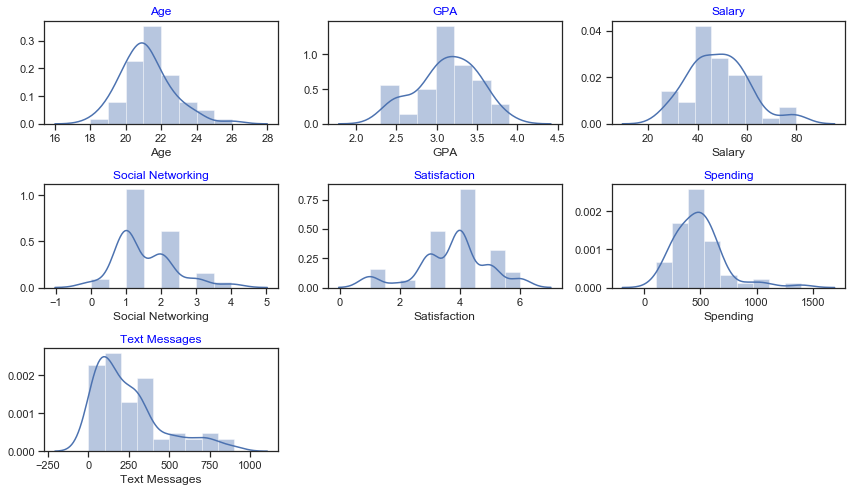

In [86]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
data_plot.drop(['ID'], axis='columns', inplace=True)

fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(3,3,i+1)
   sns.distplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

# Problem Statement 3:

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet

# Import packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
%matplotlib inline
import os
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
import scipy.stats as stats
import matplotlib.pyplot as plt


# Import data

In [2]:
df = pd.read_csv('AB_shingles.csv')
df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


# Read summary

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


In [4]:
df.size

72

In [5]:
df.shape

(36, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
A    36 non-null float64
B    31 non-null float64
dtypes: float64(2)
memory usage: 656.0 bytes


# Checking null counts

In [7]:
np.any(pd.isna(df))

True

In [8]:

print('Number of null values in entire dataset',df.isnull().sum().sum())


Number of null values in entire dataset 5


In [9]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


ValueError: cannot convert float NaN to integer

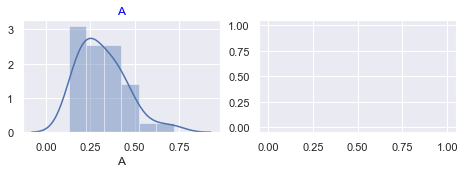

In [11]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(3,3,i+1)
   sns.distplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

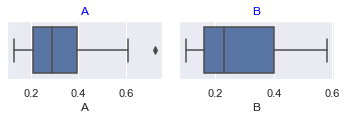

In [12]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(5,5,i+1)
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

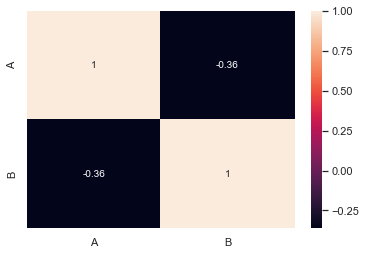

In [3]:
corr=df.corr()
sns.heatmap(corr, annot=True)
figsize=(50,30)

# 2 Variables check

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


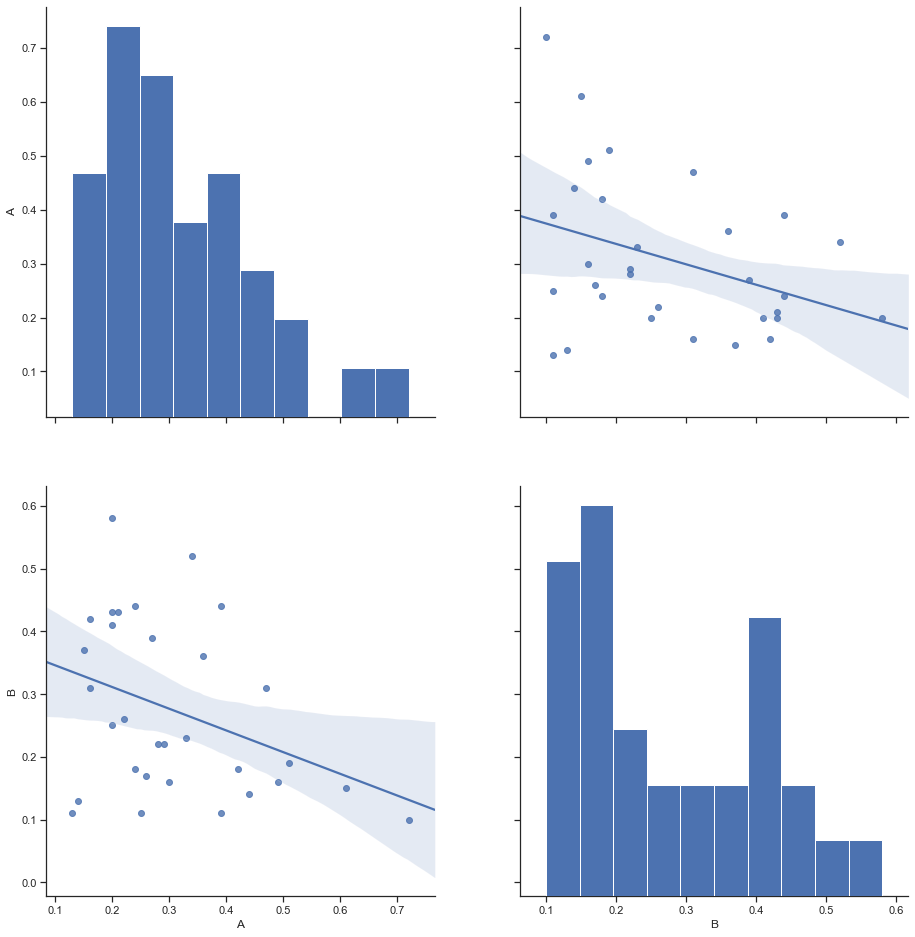

In [14]:
sns.set(style="ticks")
plots = sns.pairplot(data_plot,kind='reg')
plots.fig.set_size_inches(15,15)


# 3.1  Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps

H0: Mean moisture contents in A >= 0.35  pounds per 100 square feet

H1: Mean moisture contents in A < 0.35  pounds per 100 square feet
alpha=0.05

In [20]:
tstat,pvalue = stats.ttest_1samp(np.array(df['A'].dropna()),0.35)
print(tstat)
print(pvalue/2)

-1.4735046253382782
0.07477633144907513


Pvalue is greater than Alpha , Hence Don't reject H0. 

As we can see, the pvalue is > 0.05. So, we do not have enough evidence to prove that mean mositure contents for A Shingles (0.316667) will be less than 0.35 pounds per 100 sqrt. Hence, we fail to reject the null hypothesis


In [ ]:
H0: Mean moisture contents in B >= 0.35  pounds per 100 square feet

H1: Mean moisture contents in B < 0.35  pounds per 100 square feet
alpha=0.05

In [21]:
tstat,pvalue = stats.ttest_1samp(np.array(df['B'].dropna()),0.35)
print(tstat)
print(pvalue/2)

-3.1003313069986995
0.0020904774003191813


Pvalue is less than Alpha , Hence reject H0. 
As we can see, the pvalue is < 0.05. So, we have enough evidence to prove that mean mositure contents for B Shingles (0.273548) will be less than 0.35 pounds per 100 sqrt. Hence, we accept the null hypothesis


# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

H0: Mean(A)=Mean(B)
H1: Mean(A)!=Mean(B)
Alpha is 0.05

In [23]:
A_data = np.array(df['A'].dropna())
B_data = np.array(df['B'].dropna())
tstat,pvalue = stats.ttest_ind(A_data,B_data,equal_var=True,nan_policy='omit')

In [25]:
print(tstat)

1.289628271966112


In [26]:
print(pvalue)

0.2017496571835328


As we can see, the pvalue is > 0.05.

So, we do not have enough evidence to reject the null hypothesis.

Hence, we cannot refute the assumption that the mean from shingles A and the mean from shingles B are same

1. The variables must follow continious distribution. i.e., shingles A and the shingles B must follow normal continuous distribution
2. The sample must be randomly collected from the population
3. The underlying distribution must be normal. Alternatively, if the data is continious, but may not be assumed to follow a normal distribution, a reasonlably large sample size is required. CLT asserts that sample mean follows a normal distribution, even if the population distribution is not normal, when sample size is atleast 30.
4. For 2 sample t-test, the population variances of 2 distributions must be equal.